# Tutorial 4 2020 MEMO


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import astropy.stats as astats

### Question 1: Maximum Likelihood and the Poisson distribution

Suppose our data obeys a Poisson distribution with parameter $\mu$, and in successive identical intervals we observe $n_1$, $n_2$, ... events. Form the likelihood function by taking the product of the distributions for each $n_i$, and differentiate the log of this (used for computational convenience) to find the maximum-likelihood estimate of $\mu$. 

Comment on whether it is what you expect.

_Hint: go back in the notes to find the Poisson probability distribution_

__Answer:__

The probability for a Poisson distribution is $P(x,\mu) = \frac{\mu^x}{x!}e^{-\mu}$.

The likelihood, given this series of $n_1$, $n_2$, etc. counts observed is:
\begin{equation}
\mathscr{L}(\mathrm{data|\mu}) = \frac{n_1\mu^{n_1} e^{-\mu}}{n_1!} \times \frac{n_2\mu^{n_2} e^{-\mu}}{n_2!} \times ..
\end{equation}

and the log-Likelihood (log-Likelihood is useful for computational ease) is:
\begin{eqnarray}
\ln(\mathscr{L}) & = &\ln(\frac{n_1\mu^{n_1}e^{-\mu}}{n_1!}) + \ln(\frac{n_2\mu^{n_2}e^{-\mu}}{n_2!}) + ..\\
&=& -N \mu + \sum_i n_i + C
\end{eqnarray}
where $C$ accounts for the constants.

Now to maximise the log likelihood ($\ln(\mathscr{L})$), we differentiate with respect to $\mu$:
\begin{eqnarray}
\frac{d\ln(\mathscr{L})}{d\mu} &=& -N + \sum_i n_i \frac{d\ln \mu}{d\mu}\\
& = & -N + \sum_i n_i(\frac{1}{\mu})
\end{eqnarray}
and set it equal to zero (0). This gives us

\begin{equation}
\mu=\frac{1}{N}\sum_i n_i
\end{equation}

This is simply an estimate of the mean, which we would use as the most likely estimate of $\mu$ given the data we accumulated.

### Question 2: Bayesian Blocks 1
Use the event data from the gamma-ray burst *00551*, and bin the events using the Bayesian blocks method.

In [2]:
# Read in the event data
edata = np.loadtxt("../data_and_plots/tteascii00551_noheader_cropped.txt")
# ravel is a useful little function that returns a flattened array
evec = edata.ravel()
print(evec[0:10])

[458. 540. 548. 562. 582. 644. 662. 674. 718. 734.]


#### 2.1 Report the bin edges

In [3]:
# Run the AstroPy bayesian Blocks implementation, 
edges = astats.bayesian_blocks(evec, fitness='events', p0=0.05)
print("Bin edges:")
print(edges)


Bin edges:
[4.58000e+02 6.84370e+04 1.10212e+05 1.14613e+05 1.29471e+05 1.36571e+05
 1.83296e+05 2.07320e+05 2.32995e+05 2.51580e+05 2.66431e+05 2.79459e+05
 4.52920e+05 9.42632e+05]


In [4]:
def bin_evts(events,bin_edges):
    counts_per_bin = np.zeros(len(bin_edges)-1)
    bin_index = 0
    i = 0

    for bin_index in range (len(bin_edges)-1):
        if (i >=len(events)):
            break
        while (events[i] <= bin_edges[bin_index+1]):
            counts_per_bin[bin_index] += 1
            i += 1
            if (i >=len(events)):
                break
    return counts_per_bin

counts_per_bin = bin_evts(evec,edges)

In [5]:
# Some faffing around to get event rates and centres of bins
bin_widths = edges[1:] - edges[0:-1]
rate_per_bin = counts_per_bin/bin_widths # this is in events/second
mid_bin = edges[0:-1]+bin_widths
print(rate_per_bin)

[0.02575795 0.0299222  0.05589639 0.08951407 0.06140845 0.03321562
 0.06689144 0.04755599 0.0764057  0.05534981 0.03676696 0.02740097
 0.02457158]


####  2.2 Plot the binned lightcurve

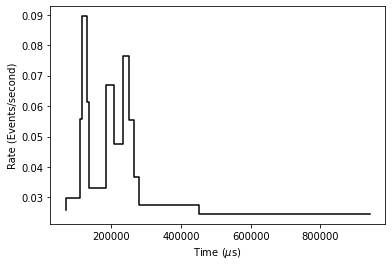

In [6]:
# Finally some plotting
plt.step(mid_bin,rate_per_bin,color='black')
plt.xlabel("Time ($\mu$s)")
plt.ylabel("Rate (Events/second)")
plt.show()

#### 2.3 Explore the effect of varying p0

13


13


32


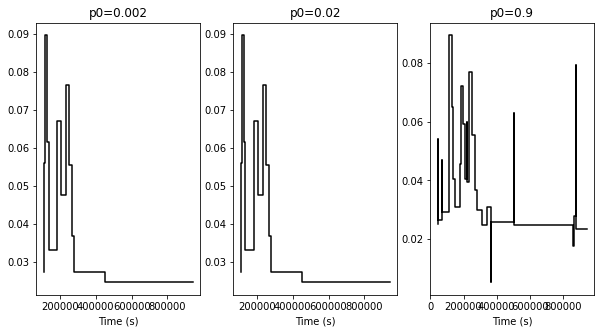

In [8]:

ax = plt.subplots(figsize=(10, 5))
for i in range (0,3):
    
    if (i==0): mp0 = 0.002
    if (i==1): mp0 = 0.02
    if (i==2): mp0 = 0.9

    medges = astats.bayesian_blocks(evec, fitness='events', p0=mp0)
    m_cts_per_bin = bin_evts(evec,medges)
    m_bin_widths = medges[1:] - medges[0:-1]
    m_rate_per_bin = m_cts_per_bin/m_bin_widths # this is in events/second
    m_mid_bin = medges[0:-1]+m_bin_widths
    print(len(medges))
    
    tmp1 = '13'+str(i+1)
    plt.subplot(int(tmp1))
    plt.step(m_mid_bin,m_rate_per_bin,color='black')
    title_string = "p0="+str(mp0)
    plt.title(title_string)
    plt.xlabel("Time (s)")

There has been little effect in variation of $p_0$. $p_0$ goes into the prior, which is the "penality" term that limits the number of changepoints. Thus we'd expect the number of changepoints/edges to change as we change $p_0$. We only see this happening in the right hand graph, where p0 = 0.9 - much less strictness imposed on the prior. (Actually $p_0=0.9$ means we are ok with 9/10 edges being false positives, which we are definitely **not** ok with!) The fact that this is not happening may be related to the warning message returned by the `astropy.stats.bayesian_blocks` routine, encouraging us to determine the `ncp_prior` through simulation. [*Note from Vanessa: This is what question 3 is about*]

### Question 3: Simulations to determine the relationship between N, p0 and ncp_prior

Incomplete...

### Question 4: Finding outbursts

#### 4.1 Use a sigma-clipping methods to locate the outbursts in this dataset. Plot the lightcurve, highlighting the outbursts

In [9]:
colnames = ["mjd", "rate", "raterr", "year", "day", "staterr","syserr", "data_flag", "td", "tc", "tdith"]
lc = pd.read_csv("/Users/vanessa/lecturing/nassp_msc/tsda/data_and_plots/Swift_BAT_V0332+53.txt", 
                 delim_whitespace=True, skiprows=5, names=colnames)#, 
#                  dtype ={'mjd': np.float32, 'rate':np.float32, 'mag': np.float32, 'magerr': np.float32,
#                         'fl':str, 'dfl':str})
pd.DataFrame.head(lc)

,mjd,rate,raterr,year,day,staterr,syserr,data_flag,td,tc,tdith
0,53414,0.061844,0.003851,2005,44,0.002727,0.002165,0,832.0,461.50000,832.0
1,53416,0.057759,0.002077,2005,46,0.000408,0.002022,0,16536.0,12092.93750,1024.0
2,53417,0.047668,0.001920,2005,47,0.000814,0.001668,0,15960.0,4788.37500,0.0
3,53418,0.045125,0.001755,2005,48,0.000656,0.001579,0,15672.0,5963.96875,896.0
4,53420,0.031512,0.002156,2005,50,0.001587,0.001103,0,2536.0,1386.87500,0.0


In [10]:
m_mjd =  np.asarray(lc.mjd)
m_rate = np.asarray(lc.rate)
m_err = np.asarray(lc.raterr)

In [11]:
def sigma_clip(x,y,yerr,sigma,stop_percent):
    
    #Mask, weighted mean and variance includes all values to being
    mask = np.ones(len(y), np.bool)
    c_wmean = np.average(y[mask],weights = 1./yerr)
    print("First mean:", c_wmean)
    
    old_wmean = c_wmean
    c_var = math.sqrt(y[mask].var())
    # Number of iterations - to make sure we enter the while loop at least once.
    it = 1
    
    while ((abs(c_wmean - old_wmean)/old_wmean > stop_percent) or it < 2):
        print("Iter:", it)
        
        idx = np.where(y >= c_wmean + sigma*c_var)
        print("Number of points clipped:", np.size(idx))
    
        #Update mask
        mask[idx] = 0 #The points that are removed by clippin
        #inv_mask = 1 - mask # The points that clip
    
    
        # Keep the old weighted mean for comparison
        old_wmean = c_wmean
        # Calculate the new weighted mean and standard deviation
        c_wmean = np.average(y[mask],weights = 1./(yerr[mask]))
        print("Updated mean:", c_wmean)
        c_var = math.sqrt(y[mask].var())
        # Update number of iterations
        it =it + 1
        
        print(len(idx))
    
    # Return arrays of the clipped values and the indices of the clipped values
    return x[idx], y[idx], yerr[idx], idx

        
        

In [12]:
a,b,c,bright_idx = sigma_clip(m_mjd,m_rate, m_err,3.5,0.05)

First mean: 0.0005453036822311632
Iter: 1
Number of points clipped: 41
Updated mean: 0.0002640017930716142
1
Iter: 2
Number of points clipped: 79
Updated mean: 0.0001411304024370341
1
Iter: 3
Number of points clipped: 93
Updated mean: 0.00010096277940470375
1
Iter: 4
Number of points clipped: 98
Updated mean: 9.57856086723183e-05
1
Iter: 5
Number of points clipped: 100
Updated mean: 9.464457648205248e-05
1


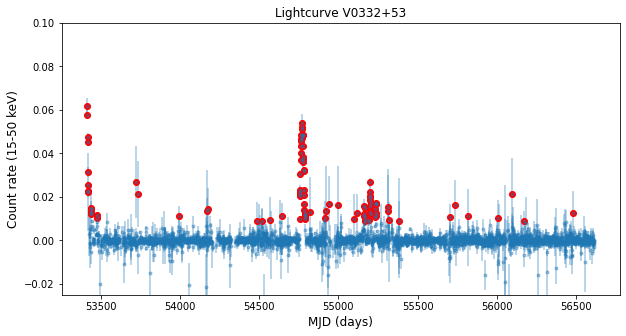

In [13]:
ax = plt.subplots(figsize=(10,5))
plt.errorbar(lc.mjd, lc.rate, lc.raterr, marker='.', alpha=0.4, ls='')
plt.xlabel("MJD (days)",fontsize="12")
plt.ylabel("Count rate (15-50 keV)",fontsize="12")
plt.title('Lightcurve V0332+53')
plt.ylim([-0.025,0.1])

#plt.axhline(c_mean,color='magenta')
#plt.axhline(c_wmean, color='black')
#plt.axhline(c_mean + my_sig,color='black', ls=":")


# Overplot the outbursts
plt.plot(a,b, 'ro')
#plt.text(59000,0.02,'3$\sigma$', fontsize=12)
#plt.plot(lc.mjd[inv_mask],lc.rate[inv_mask],'bo')

plt.show()

#### 4.2  Report the timestamps of the outburst peaks
Some decisions need to be made as to which outbursts are real or not. This can be done here or in the previous section (i.e. §4.1)

There are a few different ways this decision could be made. Here is one them:

Find bright points that are next to each other, most likely for an outburst that lasts several days.

In [14]:
z = np.ravel(bright_idx[0]) # Make sure it's a 1D array

i_start = [] # start tme of outburst
i_end = [] # end time of outburst
last = 0
tally =0

for i in z:
    if i > last:
   
        if (i + 1) in z:
            tally = tally + 1
            i = i + 1
            
        else:
            i_end = np.append(i_end,i)
            last = i
            i_start = np.append(i_start,i-tally)
            tally = 0

            
i_start = np.asarray(i_start,dtype=int)
i_end = np.asarray(i_end, dtype=int)

duration = m_mjd[i_end] - m_mjd[i_start]

print(m_mjd[i_start])
print(duration)

#I'd like to get all outbursts that last longer than a single point
total_outbursts = np.size(np.where(duration > 0))
        
print("Number of outbursts:",total_outbursts)


#print(m_mjd[i_start[np.where(duration >0)[0]]])

#Now, I'd like to get the starting indices of these outbursts.
outburst_start_indices = i_start[np.where(duration >0)[0]]

print(outburst_start_indices)
print(m_mjd[outburst_start_indices])
#print(m_mjd[i_start[(np.where(duration>0)[0])])


[53416 53437 53442 53474 53721 53733 53994 54170 54178 54489 54521 54569
 54647 54755 54822 54913 54921 54939 54999 55102 55116 55162 55196 55233
 55315 55321 55383 55707 55737 55816 56008 56097 56174 56480]
[ 7  3  0  1  0  0  0  0  0  0  0  0  0 36  0  0  0  0  0  0  0  7  9  6
  1  0  0  0  0  0  0  0  0  0]
Number of outbursts: 8
[   1   15   36 1031 1372 1405 1437 1511]
[53416 53437 53474 54755 55162 55196 55233 55315]


Now that we've isolated 8 outbursts using our criterion, we'll plot them to take a look. This step is not necessary, but it's always a good idea to eyeball your data.

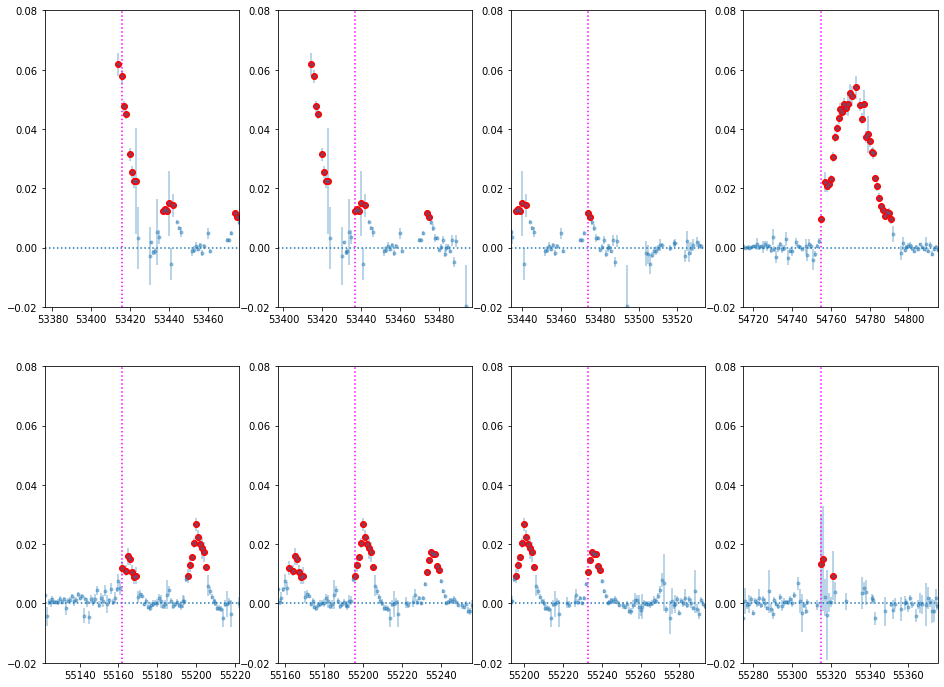

In [15]:
ax = plt.subplots(figsize=(16, 12), sharey=True)

for p in range (1,total_outbursts+1):
    
    tmp = '24'+str(p)
    plt.subplot(tmp)
    plt.errorbar(lc.mjd, lc.rate, lc.raterr, marker='.', alpha=0.4, ls='')
    #plt.xlabel("MJD (days)",fontsize="12")
    #plt.ylabel("Count rate (15-50 keV)",fontsize="12")
    plt.xlim([m_mjd[outburst_start_indices[p-1]] - 40,m_mjd[outburst_start_indices[p-1]]+60])
    plt.ylim([-0.02, 0.08])
    plt.axhline(0,ls=':')  
    plt.axvline(m_mjd[outburst_start_indices[p-1]],ls=':',color='magenta')
    
    plt.plot(m_mjd[bright_idx],m_rate[bright_idx], 'ro')
    

plt.show()

There are plenty of ways to determine the peak. You may choose the time at the centre of the outburst, or time when the flux is highest, or fit a Gaussian profile to the outburst and use the centre.

In our case we find the **time stamp at which the flux is highest**.

In [17]:
peak_time = np.zeros(total_outbursts)

for p in range (1,total_outbursts+1):
    # select only data points *in* the outburst
    this_outburst_rate = m_rate[outburst_start_indices[p-1]:
                                outburst_start_indices[p-1] + duration[p-1] + 1]
    this_outburst_mjd = m_mjd[outburst_start_indices[p-1]:
                              outburst_start_indices[p-1] + duration[p-1] + 1]
    
    #Find the outburst peak
    peak = np.where(this_outburst_rate == np.max(this_outburst_rate))
   
    #print("Time of peak: ",this_outburst_mjd[np.int(peak[0])])
    
    #Write the time of this peak into an array
    peak_time[p-1] = this_outburst_mjd[np.int(peak[0])]
    
    
print(peak_time)

[53416. 53440. 53474. 54757. 55162. 55196. 55233. 55315.]


In my final answer, I will report **7** outbursts with peak times in MJD of:
1. 53416 
2. 53440
- 53474
- 54757
- 55162
- 55196
- 55233

The peak at MJD 55315 (bottom right panel of figure above) does not look much like the other outbursts, and the data points there have huge error bars, so I doubt that this is a real outburst.

#### 4.3 Employ a Bayesian blocks algorithm to find the outbursts. 

In [18]:
try_bb = astats.bayesian_blocks( m_mjd, m_rate, m_err, fitness='measures', p0=0.05)
print("Bin edges:")
print(try_bb)

Bin edges:
[53414.  53416.5 53419.  53423.5 53436.  53440.5 53449.  53465.5 53473.
 53476.5 53479.5 53782.5 53787.5 53788.5 54703.5 54754.5 54756.  54760.5
 54761.5 54763.5 54777.5 54782.5 54784.5 54786.5 54791.5 54819.5 54830.5
 54880.5 54881.5 55114.5 55158.5 55161.5 55169.5 55172.5 55194.5 55196.5
 55198.5 55204.5 55205.5 55208.5 55231.5 55232.5 55233.5 55237.5 55239.5
 55240.5 55242.5 55453.5 55454.5 56528.5 56541.5 56616. ]


These should be the change points, i.e where outbursts start and end. Your values may differ a bit from mine depending on what you used for p0 and the prior.

#### 4.4  Are the results consistent between the sigma-clipping and the Bayesian blocks?

I'm going to show this by overplotting our 8(actually 7) outbursts from the sigma clipping along with the edges as determined by the Bayesian blocks algorithm. 

Splitting the lightcurve into 3 sections for clarity:

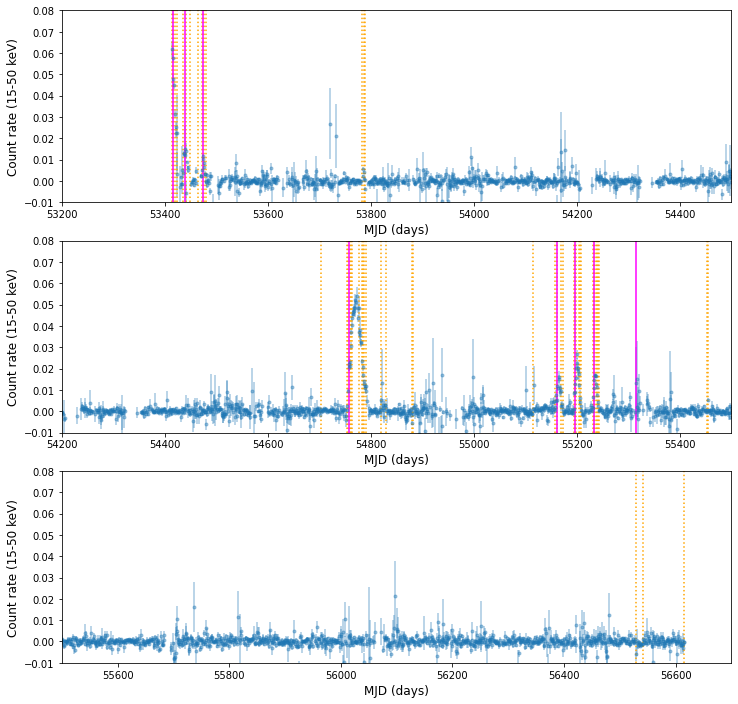

In [26]:
ax = plt.subplots(figsize=(12,12))

plt.subplot(311)
plt.errorbar(lc.mjd, lc.rate, lc.raterr, marker='.', alpha=0.4, ls='')
plt.xlabel("MJD (days)",fontsize="12")
plt.ylabel("Count rate (15-50 keV)", fontsize="12")
#plt.title("Lightcurve V0332+53")
plt.ylim([-0.01,0.08])
plt.xlim([53200,54500])

for l in try_bb:
    plt.axvline(l,color='orange',ls=":")


for j in peak_time:
    plt.axvline(j,color="magenta",ls="-")


plt.subplot(312)
plt.errorbar(lc.mjd, lc.rate, lc.raterr, marker='.', alpha=0.4, ls='')
plt.xlabel("MJD (days)",fontsize="12")
plt.ylabel("Count rate (15-50 keV)", fontsize="12")
#plt.title("Lightcurve V0332+53")
plt.ylim([-0.01,0.08])
plt.xlim([54200,55500])

for l in try_bb:
    plt.axvline(l,color='orange',ls=":")


for j in peak_time:
    plt.axvline(j,color="magenta",ls="-")
    
plt.subplot(313)
plt.errorbar(lc.mjd, lc.rate, lc.raterr, marker='.', alpha=0.4, ls='')
plt.xlabel("MJD (days)",fontsize="12")
plt.ylabel("Count rate (15-50 keV)", fontsize="12")
#plt.title("Lightcurve V0332+53")
plt.ylim([-0.01,0.08])
plt.xlim([55500,56700])

for l in try_bb:
    plt.axvline(l,color='orange',ls=":")


for j in peak_time:
    plt.axvline(j,color="magenta",ls="-")
    
plt.show()

As can be seen from the plots above, the <span style="color:orange">Bayesian blocks</span> algorithm finds all the outburts we have found through the <span style="color:magenta">sigma clipping</span>, as well as a couple extra.


For example, it finds an outburst around MJD 53780, which may be real, and one around 55450, which is just a single bright point and is almost certainly not real. Interestingly, it does not flag the bright points around MJD 54170, which we had already discarded as being noise rather than a real outburst - see the plot below.

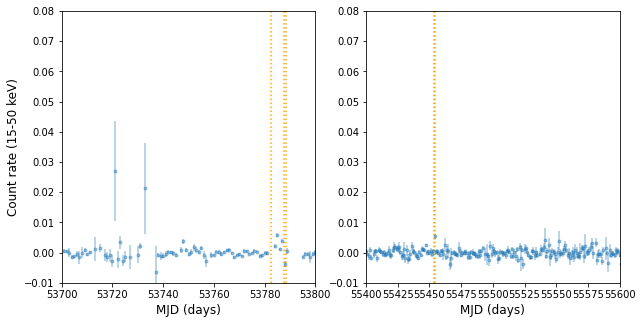

In [28]:
ax = plt.subplots(figsize=(10,5), sharey=True)

plt.subplot(121)
plt.errorbar(lc.mjd, lc.rate, lc.raterr, marker='.', alpha=0.4, ls='')
plt.xlabel("MJD (days)",fontsize="12")
plt.ylabel("Count rate (15-50 keV)", fontsize="12")
#plt.title("Lightcurve V0332+53")
plt.ylim([-0.01,0.08])
plt.xlim([53700,53800])

for l in try_bb:
    plt.axvline(l,color='orange',ls=":")


for j in peak_time:
    plt.axvline(j,color="magenta",ls="-")
    
plt.subplot(122)
plt.errorbar(lc.mjd, lc.rate, lc.raterr, marker='.', alpha=0.4, ls='')
plt.xlabel("MJD (days)",fontsize="12")
#plt.ylabel("Count rate (15-50 keV)", fontsize="12")
#plt.title("Lightcurve V0332+53")
plt.ylim([-0.01,0.08])
plt.xlim([55400,55600])

for l in try_bb:
    plt.axvline(l,color='orange',ls=":")


for j in peak_time:
    plt.axvline(j,color="magenta",ls="-")
    
plt.show()